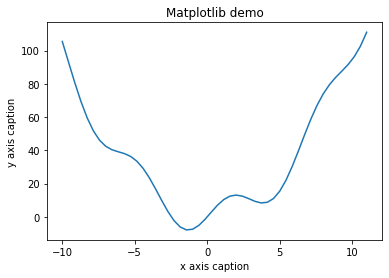

In [8]:
import numpy as np 
from matplotlib import pyplot as plt 
import math

x = np.linspace(-10,11) 
y = x * x + 10*np.sin(x); 
plt.title("Matplotlib demo") 
plt.xlabel("x axis caption") 
plt.ylabel("y axis caption") 
plt.plot(x,y) 
plt.show()

1.0

GD_Solution x1 = 3.836788, cost = 8.315588, obtained after 4 iterations
Momentum_Solution x2 = -1.306440, cost = -7.945823, obtained after 999 iterations


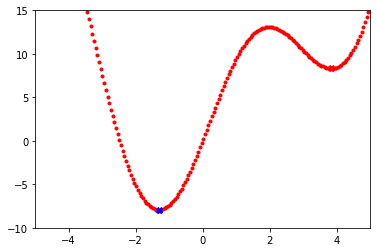

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def grad(x): # f'(x)
    return 2 * x + 10 * np.cos(x)

def cost(x): # f(x) x^2 + 10x sin(x)
    return x ** 2 + 10 * np.sin(x)

def GD_momentum(theta_init, alpha=0.1, beta=0.9, Loop = 1000):
    theta = [theta_init]
    v_old = np.zeros_like(theta_init)

    for it in range(Loop):
        v_new = beta * v_old + alpha * grad(theta[-1]) # vt
        theta_new = theta[-1] - v_new
        theta.append(theta_new)
        v_old = v_new

    return (theta,it)

def myGD1(x0, alpha=0.1, gra = 1e-3, loop = 1000):
    x = [x0]

    for it in range(loop):
        x_new = x[-1] - alpha * grad(x[-1])
        if abs(grad(x_new)) < gra:
            break
        x.append(x_new)

    return (x, it)

if __name__ == '__main__':
    X = np.linspace(-5,5,200)
    y = cost(X)
    plt.plot(X.T, y.T, 'r.')
    plt.axis([-5, 5, -10, 15])
    (x1, it1) = myGD1(5,0.1)
    print('GD_Solution x1 = %f, cost = %f, obtained after %d iterations'%(x1[-1], cost(x1[-1]), it1))
    plt.plot(x1[-1], cost(x1[-1]), 'r X')
    (x2, it2) = GD_momentum(5, 0.1, beta=0.9)
    print('Momentum_Solution x2 = %f, cost = %f, obtained after %d iterations'%(x2[-1], cost(x2[-1]), it2))
    plt.plot(x2[-1], cost(x2[-1]), 'b X')
    plt.show()

In [2]:
def my_function(fname):
  print(fname + " Refsnes")

my_function("Emil")
my_function("Tobias")
my_function("Linus")

Emil Refsnes
Tobias Refsnes
Linus Refsnes


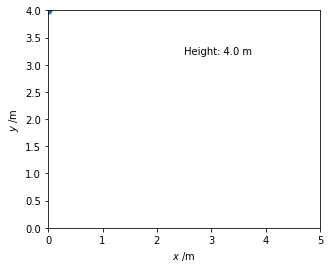

In [5]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Acceleration due to gravity, m.s-2.
g = 9.81
# The maximum x-range of ball's trajectory to plot.
XMAX = 5
# The coefficient of restitution for bounces (-v_up/v_down).
cor = 0.65
# The time step for the animation.
dt = 0.005

# Initial position and velocity vectors.
x0, y0 = 0, 4
vx0, vy0 = 1, 0

def get_pos(t=0):
    """A generator yielding the ball's position at time t."""
    x, y, vx, vy = x0, y0, vx0, vy0
    while x < XMAX:
        t += dt
        x += vx0 * dt
        y += vy * dt
        vy -= g * dt
        if y < 0:
            # bounce!
            y = 0
            vy = -vy * cor 
        yield x, y

def init():
    """Initialize the animation figure."""
    ax.set_xlim(0, XMAX)
    ax.set_ylim(0, y0)
    ax.set_xlabel('$x$ /m')
    ax.set_ylabel('$y$ /m')
    line.set_data(xdata, ydata)
    ball.set_center((x0, y0))
    height_text.set_text(f'Height: {y0:.1f} m')
    return line, ball, height_text

def animate(pos):
    """For each frame, advance the animation to the new position, pos."""
    x, y = pos
    xdata.append(x)
    ydata.append(y)
    line.set_data(xdata, ydata)
    ball.set_center((x, y))
    height_text.set_text(f'Height: {y:.1f} m')
    return line, ball, height_text

# Set up a new Figure, with equal aspect ratio so the ball appears round.
fig, ax = plt.subplots()
ax.set_aspect('equal')

# These are the objects we need to keep track of.
line, = ax.plot([], [], lw=2)
ball = plt.Circle((x0, y0), 0.08)
height_text = ax.text(XMAX*0.5, y0*0.8, f'Height: {y0:.1f} m')
ax.add_patch(ball)
xdata, ydata = [], []

interval = 1000*dt
ani = animation.FuncAnimation(fig, animate, get_pos, blit=True,
                      interval=interval, repeat=False, init_func=init)
plt.show()